In [1]:
import pandas as pd
import matplotlib
import warnings
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab
import math
import seaborn as sns

In [12]:
df_3g = pd.DataFrame(columns=['sitename','category','median_scroll', 'size', 'onload_uplt', 'implicit_uplt', 'median_uplt', 'first_interactive', 'first_paint'])
df_scroll = pd.read_csv('max_pct_viewports_scrolled_multi_3g.csv')
df_size = pd.read_csv('mobile_screens_multi_3g.csv')
df_onload = pd.read_csv('mobile_scroll_screen_viewports_onload_3g_max.csv')
df_implicit = pd.read_csv('scroll_implicit_uplt_multi_3g_median.csv')
df_median = pd.read_csv('scroll_uplt_multi_3g_median.csv')
df_lighthouse =pd.read_csv('lighthouse-1.csv')


df_3g['sitename'] = df_scroll['sitename']

# df_3g = df_3g.sort_values('sitename')
# df_onload = df_onload.sort_values('sitename')
# df_implicit = df_implicit.sort_values('sitename')
# df_median = df_median.sort_values('sitename')
# df_size = df_size.sort_values('site')
# df_size = df_size.reset_index(drop=True)

df_3g['onload_uplt'] = df_onload['value']
df_3g['implicit_uplt'] = df_implicit['value']
df_3g['median_uplt'] = df_median['value']
df_3g['size'] = df_size['numScreens']
df_3g['category'] = df_onload['category']
df_3g['first_interactive'] = df_lighthouse['first-interactive']
df_3g['first_paint'] = df_lighthouse['first-paint']

df_scroll['mean'] = df_scroll.mean(axis=1)
df_3g['median_scroll'] = df_scroll['mean']

df_3g
# df_lighthouse

,sitename,category,median_scroll,size,onload_uplt,implicit_uplt,median_uplt,first_interactive,first_paint
0,aarp.org,Home,0.311092,17.24,64770,12627.0,16758.5,NaN,9583.3
1,acm.org,Computer,0.308415,22.01,83924,5751.0,11961.0,10011.265,3609.2
2,adf.ly,Computer,0.496194,3.65,9419,8075.5,8075.5,12367.316,4780.1
3,alexa.com,Computer,0.425713,9.45,56511,15395.0,20994.5,17876.993,8417.8
4,amazon.com,Shopping,0.368232,7.59,5996,8355.0,9364.5,9064.734,5638.0
5,att.com,Business,0.393314,7.03,21469,18150.5,19212.5,39509.635,19317.3
6,blackboard.com,Reference,0.382762,10.45,45542,12017.5,16812.5,11686.757,7302.4
7,bleacherreport.com,Sports,0.372403,55.06,120000,10121.0,17784.5,24006.526,7206.9
8,bloomberg.com,News,0.439755,11.05,100994,16056.0,26220.0,32216.337,8015.6
9,carfax.com,Home,0.487821,1.86,6334,10482.5,10482.5,5835.111,4605.1


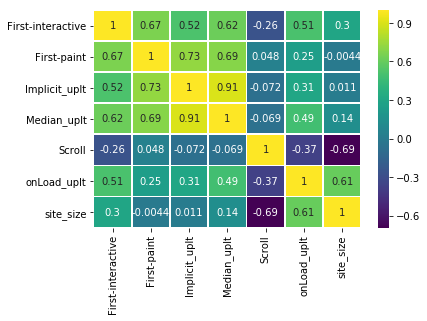

In [13]:
df_cor = {'Scroll':df_3g['median_scroll'], 'site_size':df_3g['size'], 
          'onLoad_uplt':df_3g['onload_uplt'], 'Implicit_uplt':df_3g['implicit_uplt'], 
          'Median_uplt':df_3g['median_uplt'], 'First-paint':df_3g['first_paint'], 'First-interactive':df_3g['first_interactive']}
df_cor = pd.DataFrame(df_cor).astype('float64')
r = df_cor.corr()
sns.heatmap(r, fmt=".2g", annot=True, cmap="viridis", linewidths=.8)
plt.show()

In [4]:
df_cat = df_3g.groupby(['category'], as_index = False).mean()

df_mean_std = pd.DataFrame(columns=['category','onload_mean','implicit_mean','median_mean','size_mean', 'scroll_mean',
                                    'onload_std','implicit_std','median_std','size_std', 'scroll_std'])

df_mean_std['category'] = df_cat['category']

for index,row in df_cat.iterrows():
    df_mean_std.loc[df_mean_std.category == row['category'], 'onload_mean']=row['onload_uplt']
    df_mean_std.loc[df_mean_std.category == row['category'], 'implicit_mean']=row['implicit_uplt']
    df_mean_std.loc[df_mean_std.category == row['category'], 'median_mean']=row['median_uplt']
    df_mean_std.loc[df_mean_std.category == row['category'], 'size_mean']=row['size']
    df_mean_std.loc[df_mean_std.category == row['category'], 'scroll_mean']=row['median_scroll']

df_cat = df_3g.groupby(['category'], as_index = False).agg(np.std, ddof=1)
                      

for index,row in df_cat.iterrows():
    df_mean_std.loc[df_mean_std.category == row['category'], 'onload_std']=row['onload_uplt']
    df_mean_std.loc[df_mean_std.category == row['category'], 'implicit_std']=row['implicit_uplt']
    df_mean_std.loc[df_mean_std.category == row['category'], 'median_std']=row['median_uplt']
    df_mean_std.loc[df_mean_std.category == row['category'], 'size_std']=row['size']
    df_mean_std.loc[df_mean_std.category == row['category'], 'scroll_std']=row['median_scroll']
    
df_mean_std

,category,onload_mean,implicit_mean,median_mean,size_mean,scroll_mean,onload_std,implicit_std,median_std,size_std,scroll_std
0,Business,19503.5,11958.7,16490.1,7.75,0.435558,5533.26,4298.03,5926.02,3.68139,0.0908193
1,Computer,20873.5,9895.68,12510.6,10.8664,0.406828,25502.5,3756.03,5242.94,7.62179,0.103086
2,Games,29937.3,12680.5,16278,11.7467,0.437773,23859.3,6830.46,10245.8,10.8177,0.107769
3,Health,58842.5,27335.8,37125,7.16,0.389249,30986.1,18040.1,14958.8,0.19799,0.0118225
4,Home,30086.5,9822.62,12149.5,13.0125,0.372195,26944,2225.7,3405.91,10.1079,0.0973142
5,Kids and Teens,26604.5,12269.5,12919.2,6.695,0.434317,10917,6653.87,6169.15,2.45366,0.012456
6,News,70244,14973.2,20147.1,21.274,0.316778,38504.1,6867.88,7781.08,10.4666,0.0777838
7,Recreational,32041,9988.5,20742.5,7.97,0.484635,NaN,NaN,NaN,NaN,NaN
8,Reference,39324,9517.75,13663.8,12.265,0.363955,8793.58,3535.18,4453,2.5668,0.0265968
9,Science,20723,9298.5,13030.5,8.43,0.431496,8807.72,2041.42,2632.56,1.66877,7.38362e-05


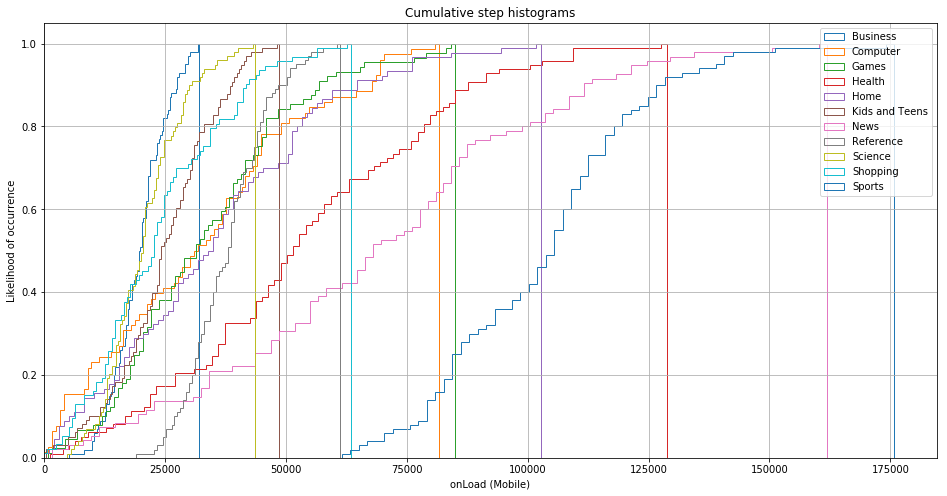

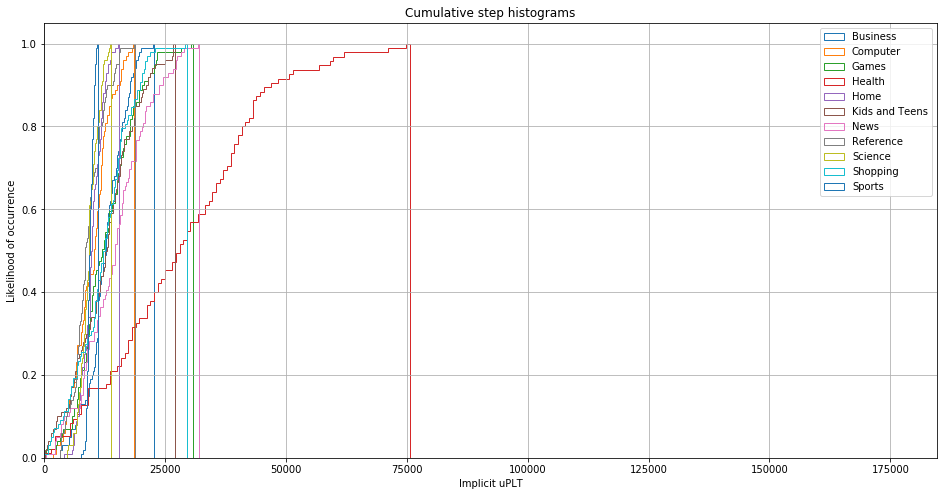

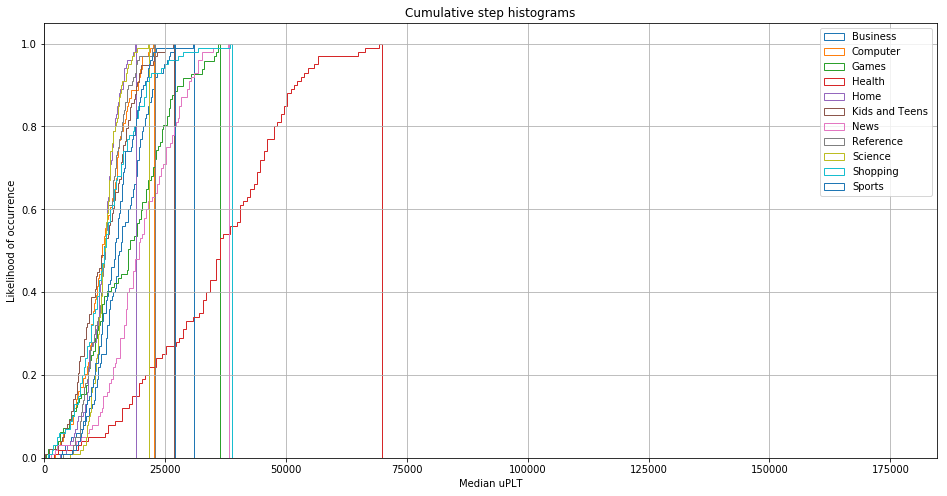

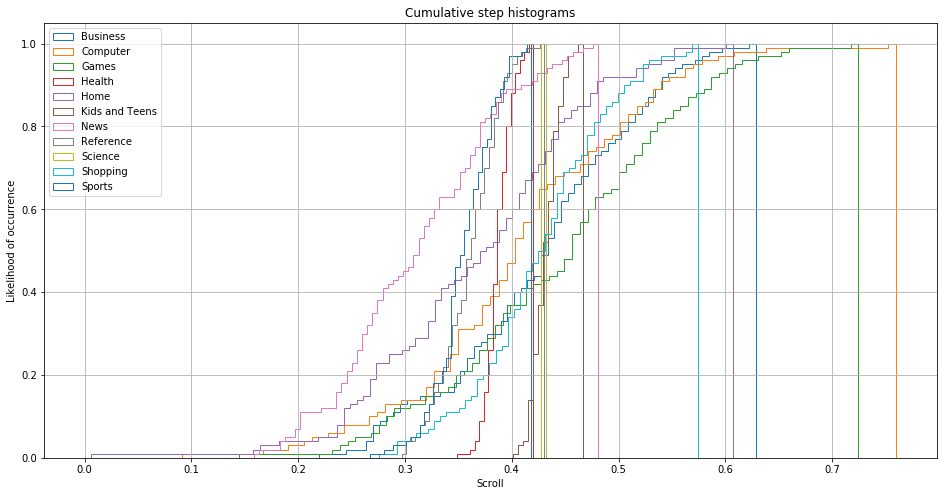

In [5]:
np.random.seed(0)

n_bins = 100

fig5, ax5 = plt.subplots(figsize=(16, 8))
fig6, ax6 = plt.subplots(figsize=(16, 8))
fig7, ax7 = plt.subplots(figsize=(16, 8))
fig8, ax8 = plt.subplots(figsize=(16, 8))

for index,row in df_mean_std.iterrows():
    if not math.isnan(row['onload_std']):
        x5 = np.random.normal(row['onload_mean'], row['onload_std'], size=100)
        n5, bins5, patches5 = ax5.hist(x5, n_bins, normed=1, histtype='step',
                           cumulative=True, label=row['category'],range=(0, x5.max()))

for index,row in df_mean_std.iterrows():
    if not math.isnan(row['implicit_std']):
        x6 = np.random.normal(row['implicit_mean'], row['implicit_std'], size=100)
        n6, bins6, patches6 = ax6.hist(x6, n_bins, normed=1, histtype='step',
                           cumulative=True, label=row['category'], range=(0, x6.max()))
        
for index,row in df_mean_std.iterrows():
    if not math.isnan(row['median_std']):
        x7 = np.random.normal(row['median_mean'], row['median_std'], size=100)
        n7, bins7, patches7 = ax7.hist(x7, n_bins, normed=1, histtype='step',
                           cumulative=True, label=row['category'], range=(0, x7.max()))

for index,row in df_mean_std.iterrows():
    if not math.isnan(row['scroll_std']):
        x8 = np.random.normal(row['scroll_mean'], row['scroll_std'], size=100)
        n8, bins8, patches8 = ax8.hist(x8, n_bins, normed=1, histtype='step',
                           cumulative=True, label=row['category'], range=(0, x8.max()))

ax5.grid(True)
ax5.legend(loc='upper right')
ax5.set_title('Cumulative step histograms')
ax5.set_xlabel('onLoad (Mobile)')
ax5.set_ylabel('Likelihood of occurrence')

ax6.grid(True)
ax6.legend(loc='upper right')
ax6.set_title('Cumulative step histograms')
ax6.set_xlabel('Implicit uPLT')
ax6.set_ylabel('Likelihood of occurrence')

ax7.grid(True)
ax7.legend(loc='upper right')
ax7.set_title('Cumulative step histograms')
ax7.set_xlabel('Median uPLT')
ax7.set_ylabel('Likelihood of occurrence')

ax8.grid(True)
ax8.legend(loc='upper left')
ax8.set_title('Cumulative step histograms')
ax8.set_xlabel('Scroll')
ax8.set_ylabel('Likelihood of occurrence')

xmin, xmax = ax5.get_xlim()
ax5.set_xlim([0, xmax])
ax6.set_xlim([0, xmax])
ax7.set_xlim([0, xmax])
plt.show()